#### Exploring kMeans clustering

Content taken from Jake VanderPlas's 'Python Data Science Handbook' and Imad Dabbura's post on 'K-means Clustering ..'

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()   # for plot styling
import numpy as np

In [2]:
# searches for a predetermined number of clusters within an unlabeled multidimensional dataset.

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [6]:
X, y_true = make_blobs(n_samples = 300, centers = 4,
                       cluster_std = 0.68, random_state =0)

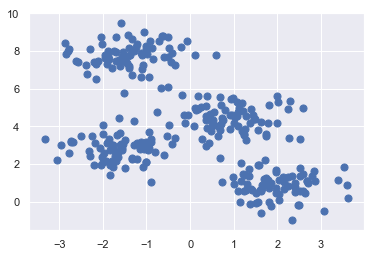

In [16]:
plt.scatter(X[:,0], X[:,1], s=50)

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=4)

In [19]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
y_kmeans = kmeans.predict(X)

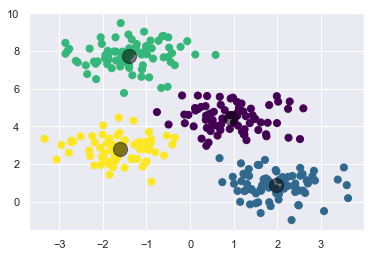

In [28]:
#
plt.scatter(X[:,0], X[:,1], c = y_kmeans, s=50, cmap = 'viridis')
plt.scatter(centers[:,0], centers[:,1], c = 'black', s=200, alpha = 0.5)

In [25]:
centers = kmeans.cluster_centers_       # as determined by the kmeans estinmator

In [26]:
centers

array([[ 0.9272565 ,  4.42987105],
       [ 1.97289152,  0.86371974],
       [-1.38990907,  7.74278587],
       [-1.60689661,  2.80206822]])

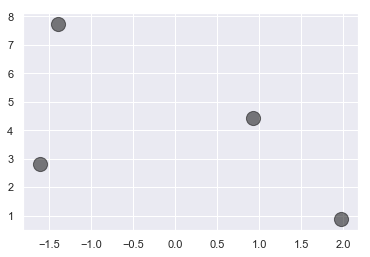

In [27]:
plt.scatter(centers[:,0], centers[:,1], c = 'black', s=200, alpha = 0.5)

How this algorithm finds these clusters easily?

##### Expectation-Maximization

E-Step : assign points to the nearest cluster <br> <br>
M-Step : set the cluster centers to the mean  -- Maximizing some fitness function that defines the location of the cluster centers - In this case, maximization is accomplished by taking a simple mean of the data in each cluster
<br> <br>
Each repition of E and M step : better estimate of the cluster characteristics

#### basic implementation of k-Means algorithm

In [32]:
from sklearn.metrics import pairwise_distances_argmin

In [39]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2.a Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2.b Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # 2.c Check for convergence
        if np.all(centers == new_centers):
            print(centers)
            break
        centers = new_centers
        print(centers)
    return centers, labels

        
        

In [40]:
centers, labels = find_clusters(X,4)

[[ 0.90744145  5.38500461]
 [-1.41043511  7.8169445 ]
 [ 1.09582066  4.07858293]
 [ 0.12793111  1.93143619]]
[[ 0.61576441  5.14830036]
 [-1.41186861  7.78882311]
 [ 1.02916635  4.0161642 ]
 [ 0.1961455   1.79957636]]
[[ 0.44149902  5.06819035]
 [-1.41186861  7.78882311]
 [ 0.96258738  4.01807247]
 [ 0.25120478  1.7480768 ]]
[[ 0.20194688  4.935557  ]
 [-1.41186861  7.78882311]
 [ 1.03312631  4.03381729]
 [ 0.27960875  1.7131643 ]]
[[-0.39432298  4.62752899]
 [-1.41043511  7.8169445 ]
 [ 1.19021059  4.17426088]
 [ 0.38457837  1.64761156]]
[[-1.13420898  3.80884045]
 [-1.41043511  7.8169445 ]
 [ 1.19811294  4.32834537]
 [ 0.9259156   1.29646787]]
[[-1.5518758   2.94455491]
 [-1.38821757  7.7695251 ]
 [ 0.99969458  4.43134925]
 [ 1.93527935  0.86623529]]
[[-1.60689661  2.80206822]
 [-1.38990907  7.74278587]
 [ 0.9272565   4.42987105]
 [ 1.97289152  0.86371974]]
[[-1.60689661  2.80206822]
 [-1.38990907  7.74278587]
 [ 0.9272565   4.42987105]
 [ 1.97289152  0.86371974]]


In [41]:
centers

array([[-1.60689661,  2.80206822],
       [-1.38990907,  7.74278587],
       [ 0.9272565 ,  4.42987105],
       [ 1.97289152,  0.86371974]])

In [42]:
labels

array([3, 1, 2, 1, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2,
       0, 0, 1, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 2, 1, 0, 0, 0,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2,
       1, 1, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2,
       0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       3, 0, 1, 0, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 1, 3, 2, 0, 1,
       3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 3, 3, 2,
       1, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 3, 0, 1, 0, 3, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 3, 2, 0, 0, 2, 3, 3, 1, 2, 2, 0, 3,
       1, 0, 2, 1, 2, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3,
       1, 0, 1, 2, 3, 3, 1, 1, 1, 3, 3, 2, 1, 0], d

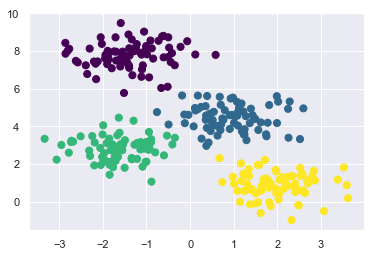

In [47]:
plt.scatter(X[:,0], X[:,1], c=labels,
           s =50, cmap = 'viridis')

In [52]:
# initializing with different random seed
# The global optimal result may not be achieved

centers, labels = find_clusters(X, 4, rseed=0)

[[-1.03834248  5.3837216 ]
 [ 1.74797032  1.39310174]
 [ 0.81619621  3.60386858]
 [ 2.02083659  0.36710047]]
[[-1.4142506   6.30690917]
 [ 1.79987315  1.36575004]
 [ 0.13282704  3.59324475]
 [ 2.08528172  0.39327781]]
[[-1.33534315  7.62050367]
 [ 1.83167773  1.47306436]
 [-0.3500445   3.5920617 ]
 [ 2.08528172  0.39327781]]
[[-1.38990907  7.74278587]
 [ 1.87060982  1.55826589]
 [-0.37392131  3.63168036]
 [ 2.08528172  0.39327781]]
[[-1.38990907  7.74278587]
 [ 1.87649395  1.64897488]
 [-0.38841655  3.6321067 ]
 [ 2.06682258  0.41672809]]
[[-1.38990907  7.74278587]
 [ 1.80476468  1.76541174]
 [-0.40001197  3.63467888]
 [ 2.09060317  0.47282158]]
[[-1.38990907  7.74278587]
 [ 1.82499871  1.86044538]
 [-0.41662486  3.63100109]
 [ 2.07387303  0.4826155 ]]
[[-1.38990907  7.74278587]
 [ 1.85763624  2.05600361]
 [-0.4517949   3.6205564 ]
 [ 2.05149493  0.50569586]]
[[-1.38990907  7.74278587]
 [ 1.84540769  2.55043082]
 [-0.51200522  3.60797806]
 [ 2.01442979  0.60330406]]
[[-1.38990907  7.74

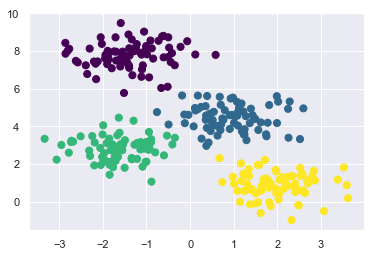

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [54]:
# The number of clusters must be selected beforehand
labels = KMeans(6, random_state= 0).fit_predict(X)

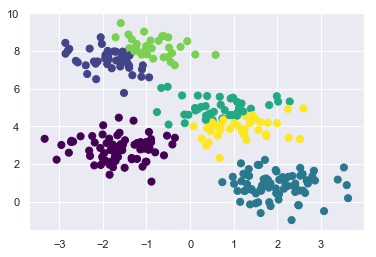

In [55]:
plt.scatter(X[:,0], X[:,1], c=labels,
           s=50, cmap = 'viridis')

Whether the result is meaningful is a question that is difficult to answer definitively; one approach that is rather intuitive is called silhouette analysis

### Evaluation Methods

Two metrics that may give us some intuition about k: <br>
    Elbow method <br>
    Silhouette analysis

#### Elbow method

This method gives us an intuiition about what a good k number of clusters would be based on the * sum of squared distance (SSE) * between data points and their assigned cluster's centroids <br>
We pick k at the spot where SSE starts to flatten out and forming an elbow.

In [62]:
sse = []
list_k = list(range(1, 10))

In [63]:
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)    # appending the  errors of the fiited model to sse

In [66]:
#km.inertia_

In [64]:
sse

[2873.0022647891356,
 1250.44287540029,
 608.2518005826489,
 271.62072313001846,
 241.85226329770296,
 216.87365845150615,
 194.171937690786,
 174.4586712906717,
 156.98442068751365]

Text(0,0.5,'Sum of squared distance')

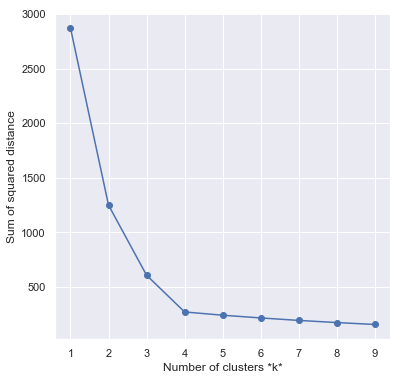

In [65]:
# plot sse against k

plt.figure(figsize=(6,6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

The graph shows that k = 4 is not a bad choice.

#### Silhouette Analysis

It could be used to determine the degree of separation between clusters. for each sample : <br>
    * Compute the average distance from all datapoints for the same cluster(ai) <br>
    * Compute the average distance from all data points in the closest cluster (bi) <br>
     Compute the coefficients..............

We want coefficients to be as big as possible and close to 1 to have good clusters

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

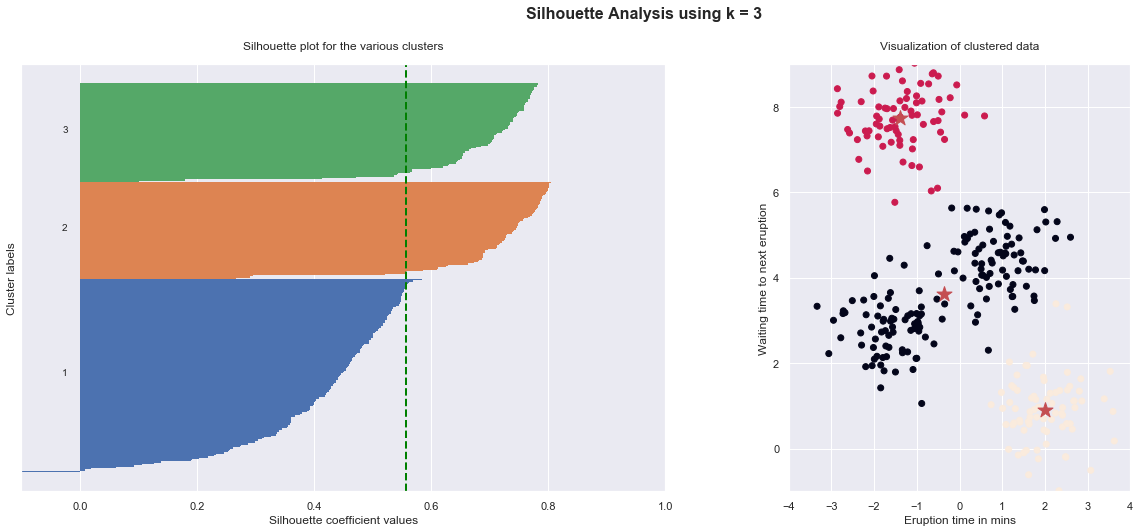

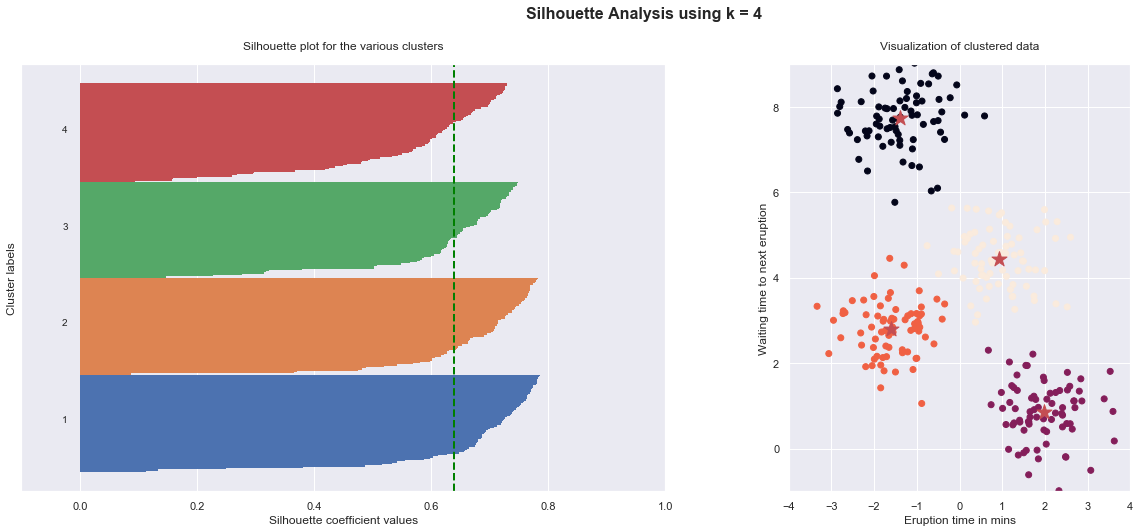

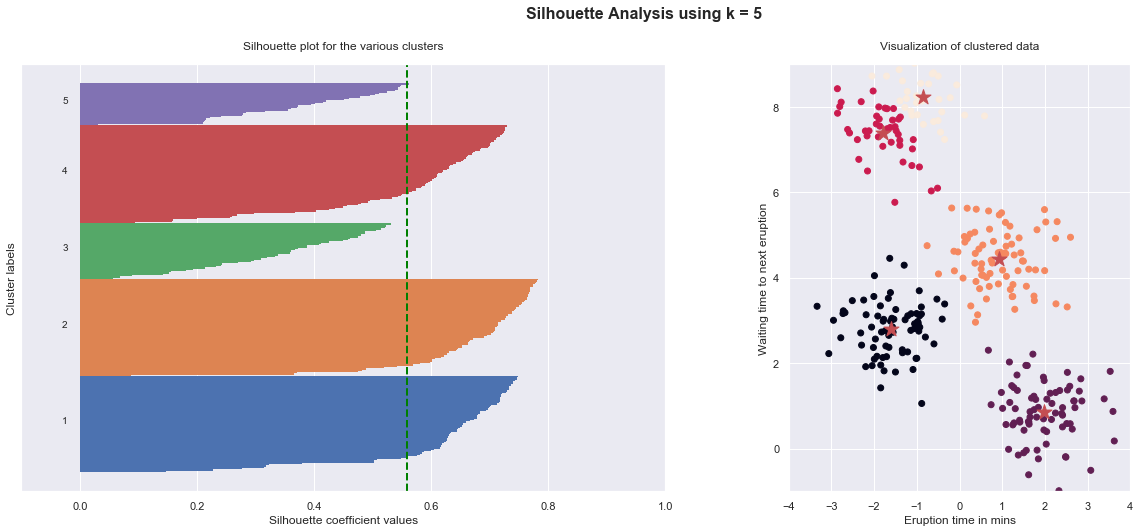

In [73]:
for i,k in enumerate([3, 4, 5]):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # Run the kMeans algorithm
    km_sl = KMeans(n_clusters=k)
    labels = km_sl.fit_predict(X)
    centroids = km_sl.cluster_centers_
    
    
    # Get Silhouette samples
    
    silhouette_vals = silhouette_samples(X, labels) 
    # print(silhouette_vals[labels])
    
    
    # Silhouette plot
    
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower,y_upper), cluster_silhouette_vals, edgecolor = 'None', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i+1))
        y_lower += len(cluster_silhouette_vals)
        
        
        
    # Get the average Silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle = '--', linewidth = 2, color = 'green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02)
    
    
    # Scatter plot of data colored with labels
    
    ax2.scatter(X[:,0], X[:,1], c=labels)
    ax2.scatter(centroids[:,0], centroids[:,1], marker = '*', c = 'r', s =250)
    ax2.set_xlim([-4,4])
    ax2.set_ylim([-1,9])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette Analysis using k = {k}',
                fontsize = 16, fontweight = 'semibold', y =1.05)
    

The above plot shows that n_clusters = 4 has the best avg. silhouette score of around 0.65 and all clusters being above the avg. silhouette score shows that it is a good choice.

#### Drawbacks of k-Means clustering (To be added) .......